<a href="https://colab.research.google.com/github/Shaikmd3797/CUSTOMER-CONVERSION-PREDICTION-FOR-INSURANCE/blob/main/CUSTOMER_CONVERSION_PREDICTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# ***Model for Customer Conversion Preiction.***

 # **AIM:**
     
*  # *Steps of project.*


1.  *data cleaning.*
2.  *label encoding.*
3.  *EDA for dataset.*
4.  *splitting of data*
5.  *scaling of the data*
6.  *build the model* 

 *   Logistic regression algorithm
 *   KNN classifier algorithm
 *   Decision tree classifier 
 *   Random Forest Classifier
 *   Extreme Gradient Boost classifier 
 *   Voting classifier 

7.  *evaluate the model*

 *   Evaluation metric of Logistic regression algorithm
 *   Evaluation metric of KNN classifier algorithm
 *   Evaluation metric of Decision tree classifier 
 *   Evaluation metric of Random Forest Classifier
 *   Evaluation metric of Extreme Gradient Boost classifier 
 *   Evaluation metric of Voting classifier 








# **1. Data Cleaning**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('train (1).csv')   # read the file
print('shape of the raw file :', df.shape)                   # shape of the raw file


shape of the raw file : (45211, 11)


**drop duplicates from dataset**

In [7]:
df=df.drop_duplicates()           # drop duplicates from the dataset
print('shape of the dataset after deleting the duplicates :', df.shape) # shape of the dataset after deleting the duplicates

shape of the dataset after deleting the duplicates : (45205, 11)


**checking missing values**

In [8]:
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

**Checking dataset format**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45205 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45205 non-null  int64 
 1   job             45205 non-null  object
 2   marital         45205 non-null  object
 3   education_qual  45205 non-null  object
 4   call_type       45205 non-null  object
 5   day             45205 non-null  int64 
 6   mon             45205 non-null  object
 7   dur             45205 non-null  int64 
 8   num_calls       45205 non-null  int64 
 9   prev_outcome    45205 non-null  object
 10  y               45205 non-null  object
dtypes: int64(4), object(7)
memory usage: 4.1+ MB


# **Outliers detection**

In [10]:
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.000000,45205.000000
mean,40.937087,15.80688,258.183055,2.763898
std,10.619130,8.32234,257.538504,3.098189
min,18.000000,1.00000,0.000000,1.000000
25%,33.000000,8.00000,103.000000,1.000000
50%,39.000000,16.00000,180.000000,2.000000
75%,48.000000,21.00000,319.000000,3.000000
max,95.000000,31.00000,4918.000000,63.000000


In [11]:
cont_col=['age','dur','num_calls']
def outliers_check(df,col):
  q1=df[col].quantile(0.25)  # 25 th quantile
  q3=df[col].quantile(0.75)  # 75 th quantile
  iqr=q3-q1
  upper=q3+1.5*iqr
  lower=q1-1.5*iqr
  df[col]=df[col].clip(lower,upper)
  return (df[col])

In [12]:
outliers=[]
for i in cont_col:
  df[i]=outliers_check(df,i)
df.describe()

,age,day,dur,num_calls
count,45205.000000,45205.00000,45205.00000,45205.000000
mean,40.869052,15.80688,234.95620,2.392235
std,10.395247,8.32234,176.75476,1.600152
min,18.000000,1.00000,0.00000,1.000000
25%,33.000000,8.00000,103.00000,1.000000
50%,39.000000,16.00000,180.00000,2.000000
75%,48.000000,21.00000,319.00000,3.000000
max,70.500000,31.00000,643.00000,6.000000


# **Dealing with missing value.**

In [13]:
df['y'] = df.y.map({'no':0,'yes':1})   # encoding for target column
df.describe()

,age,day,dur,num_calls,y
count,45205.000000,45205.00000,45205.00000,45205.000000,45205.000000
mean,40.869052,15.80688,234.95620,2.392235,0.117000
std,10.395247,8.32234,176.75476,1.600152,0.321424
min,18.000000,1.00000,0.00000,1.000000,0.000000
25%,33.000000,8.00000,103.00000,1.000000,0.000000
50%,39.000000,16.00000,180.00000,2.000000,0.000000
75%,48.000000,21.00000,319.00000,3.000000,0.000000
max,70.500000,31.00000,643.00000,6.000000,1.000000


# **EDA of features and target**

In [14]:
def EDA (data,cat_feature, num_feature,target):
  # histogram for continuous variables
  for i in num_feature:
    plt.figure(figsize=(15, 10))
    sns.histplot(x=i,data=data,hue=target,bins=10,kde=True,multiple='stack')
    plt.show()
    print('**************************************************************************************************************************')
    

  #box plot for contious varibles
  fig,axes=plt.subplots(1,len(num_feature),sharey=False,figsize=(15,10))
  for ix,i in enumerate(num_feature):  
    sns.boxplot(y=i,data=data,x=target,ax=axes[ix])
    axes[ix].set_title(f'box plot of {i} column ')
  plt.show()
  print('*****************************************************************************************************************************')

  #count plot for categorical variables
  for i in cat_feature:
    fig,axes=plt.subplots(1,2,sharey=True,figsize=(15,10))
    fig.suptitle(f'counting of column {i}')
    sns.countplot(x=i,data=data,ax=axes[0])
    plt.xticks(rotation=90)
    sns.countplot(x=i,hue=target,data=data,ax=axes[1])
    plt.xticks(rotation=90)
    plt.show()
    print('***************************************************************************************************************************')

  for i in cat_feature:
    plt.figure(figsize=(15, 10))
    df.groupby(i)[target].mean().sort_values().plot(kind='barh')
    plt.show()
    print('***************************************************************************************************************************')
  
  #correlation heatmap
  plt.figure(figsize=(15, 10))
  sns.heatmap(data.corr(),cmap='RdBu_r',annot=True)
  plt.show()
  print('******************************************************************************************************************************')
    

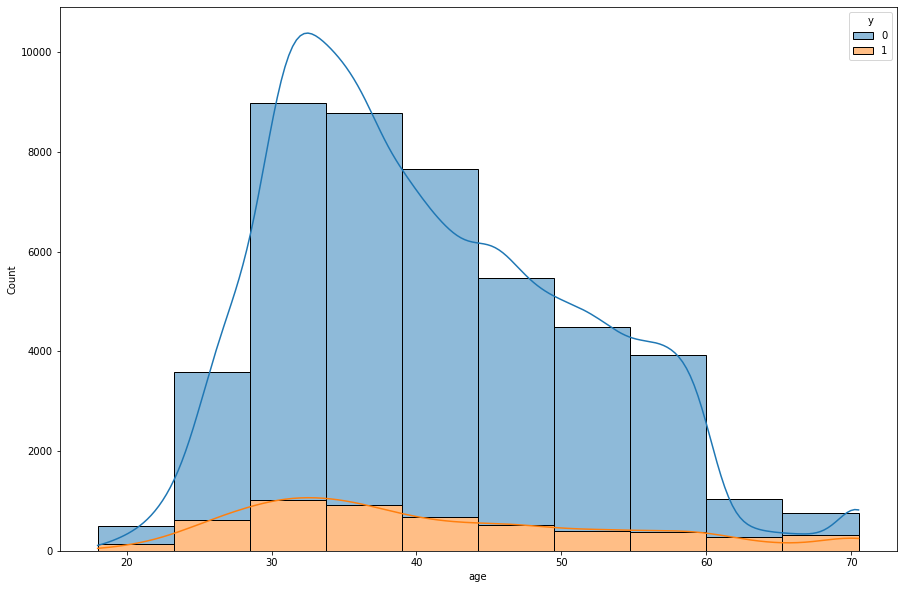

**************************************************************************************************************************


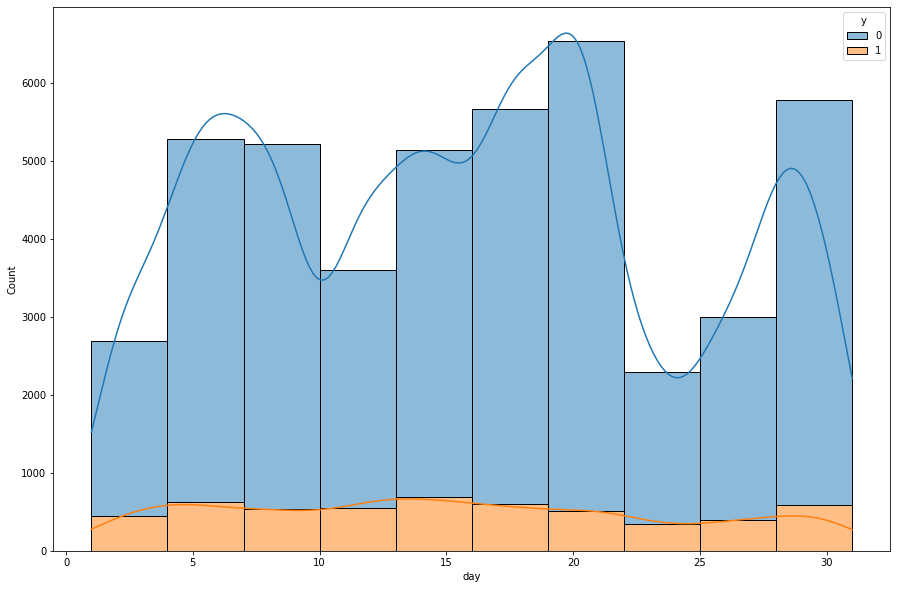

**************************************************************************************************************************


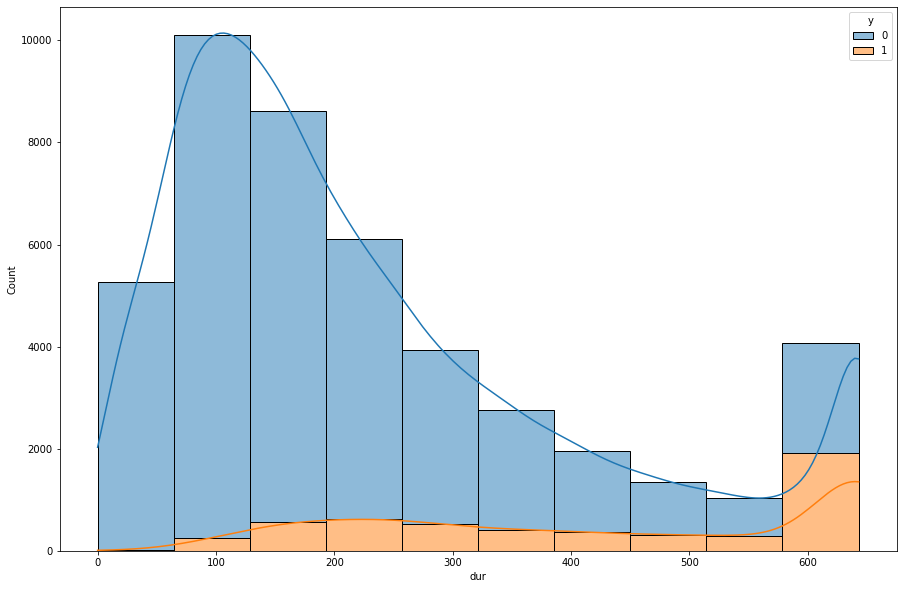

**************************************************************************************************************************


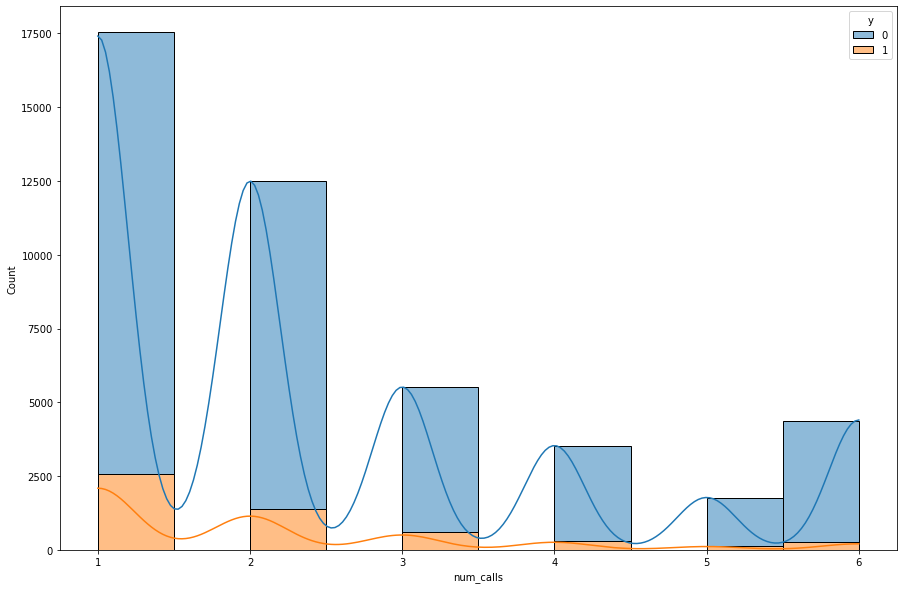

**************************************************************************************************************************


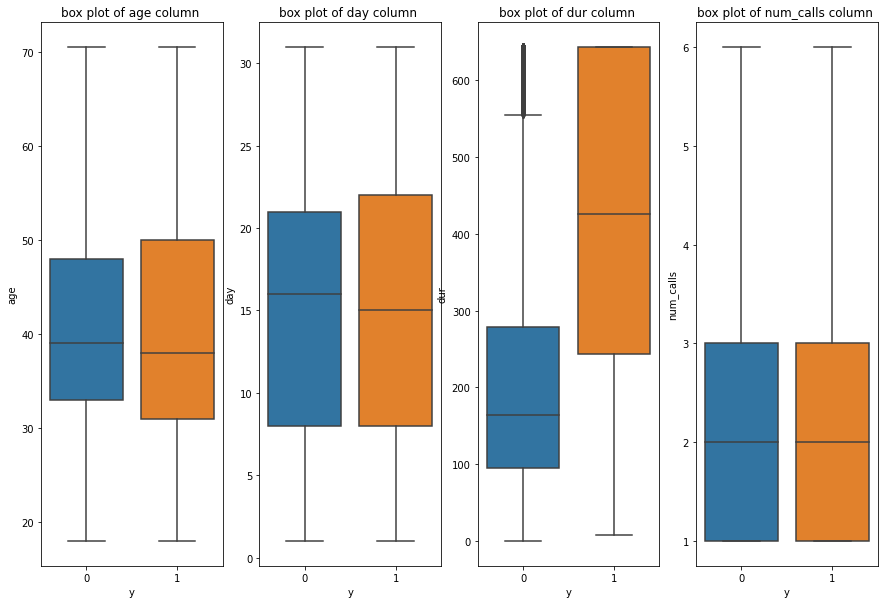

*****************************************************************************************************************************


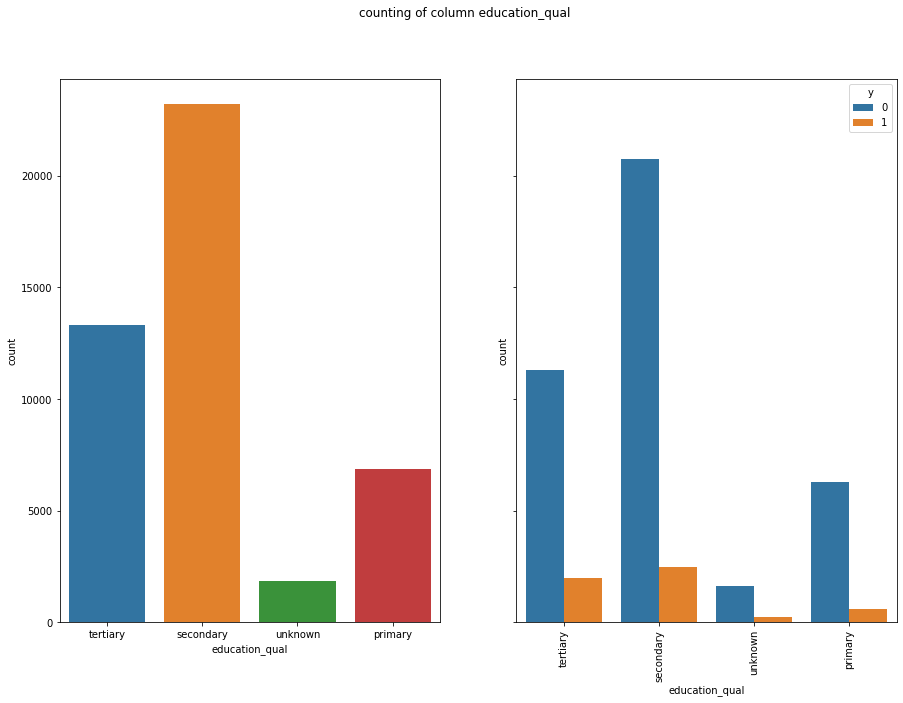

***************************************************************************************************************************


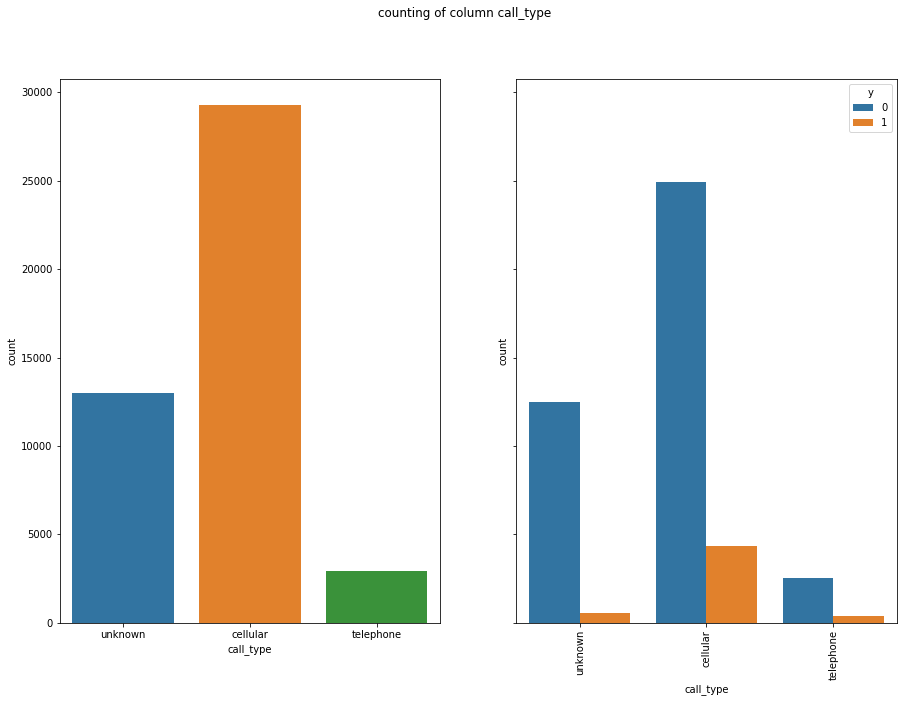

***************************************************************************************************************************


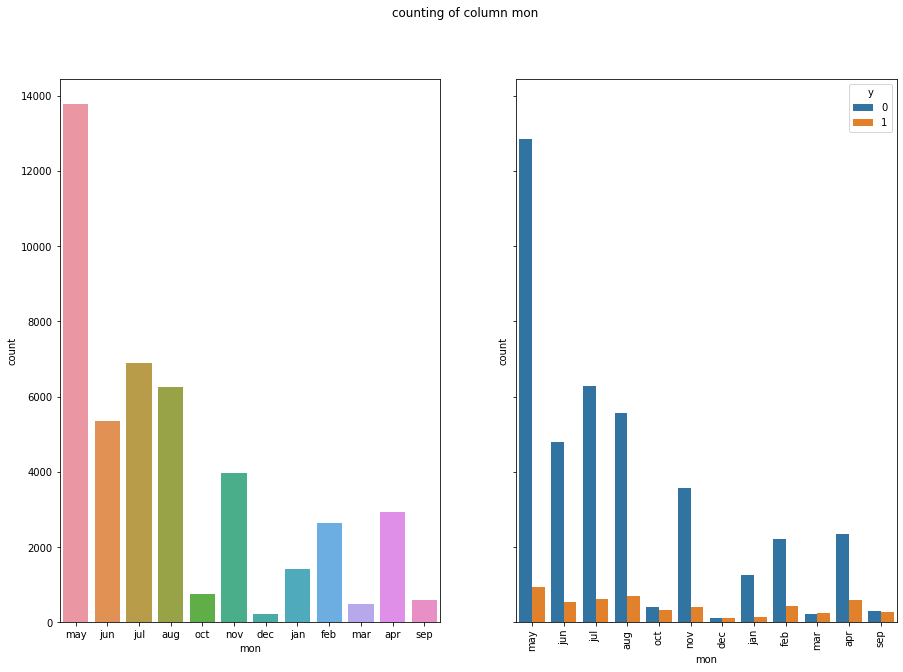

***************************************************************************************************************************


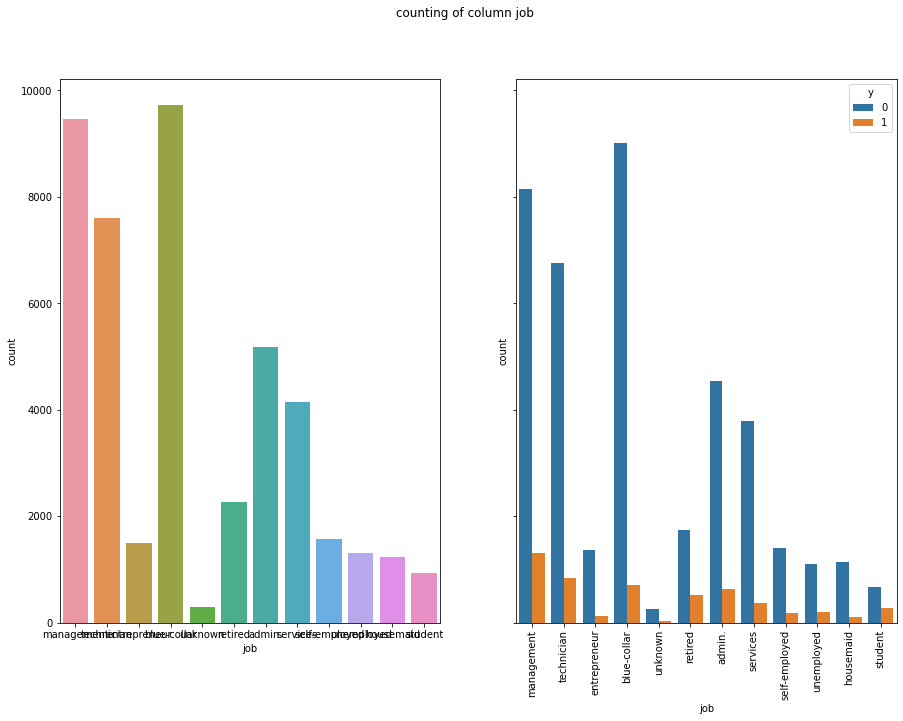

***************************************************************************************************************************


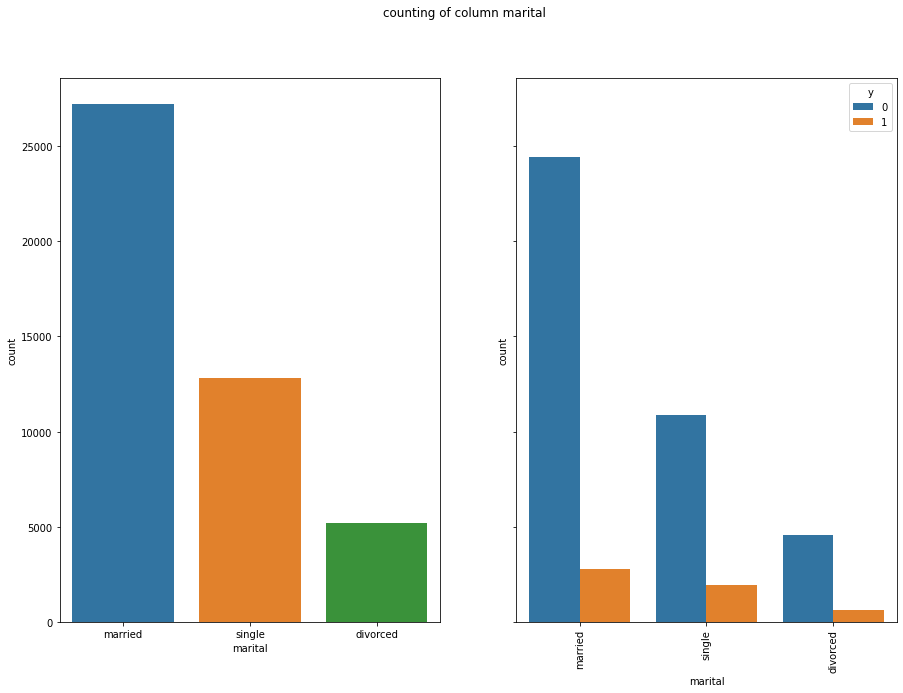

***************************************************************************************************************************


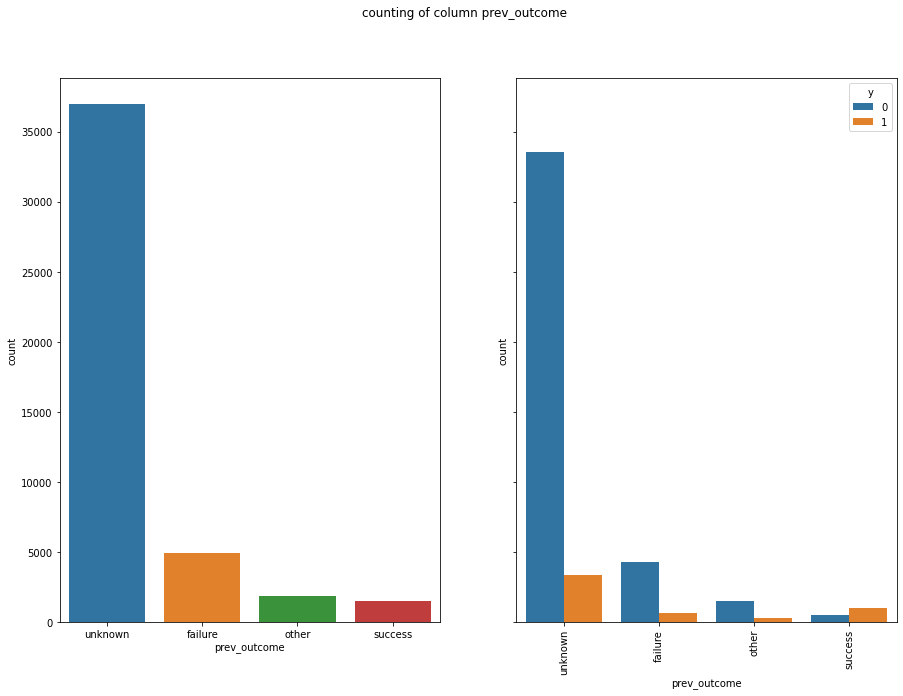

***************************************************************************************************************************


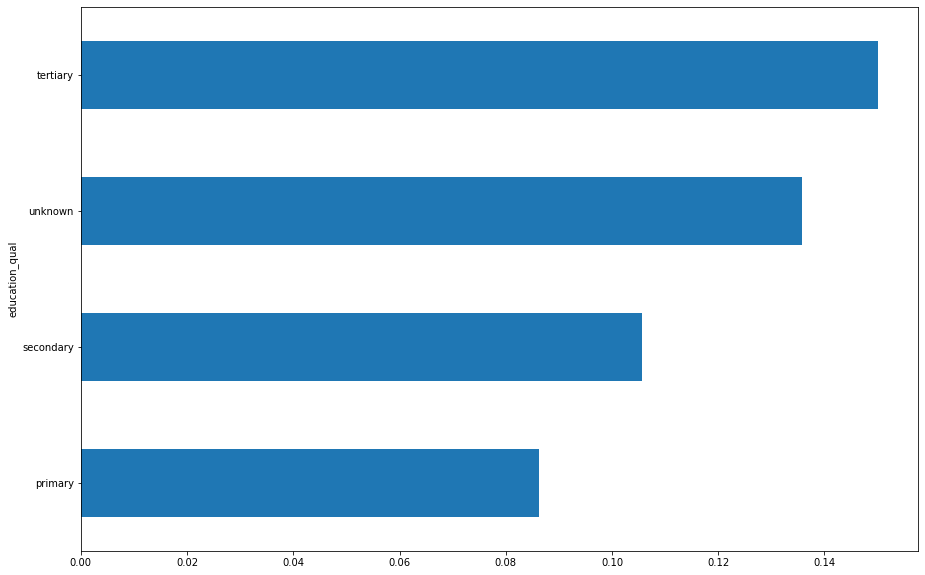

***************************************************************************************************************************


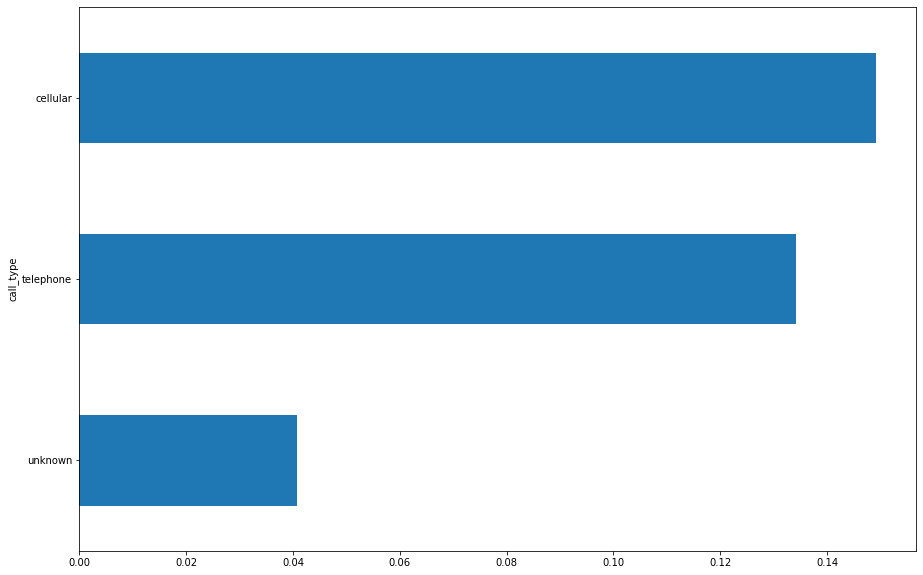

***************************************************************************************************************************


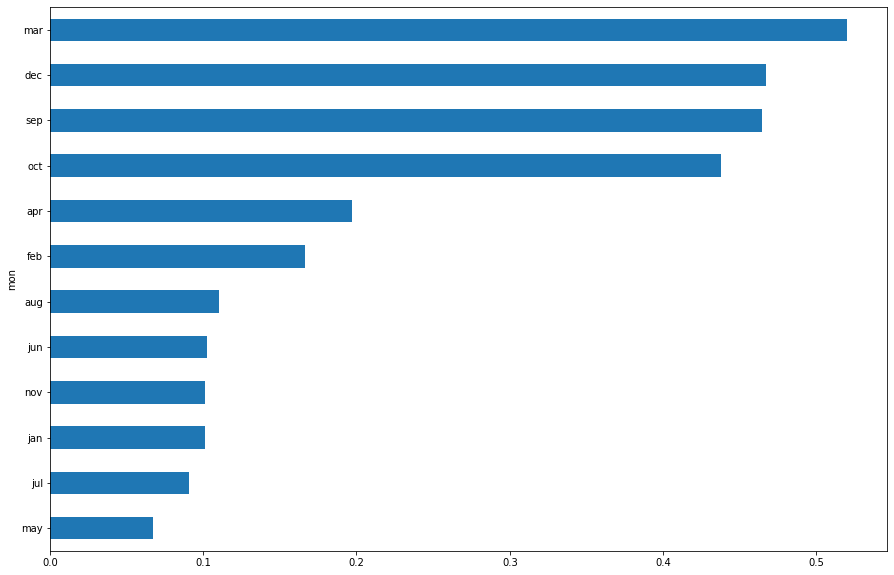

***************************************************************************************************************************


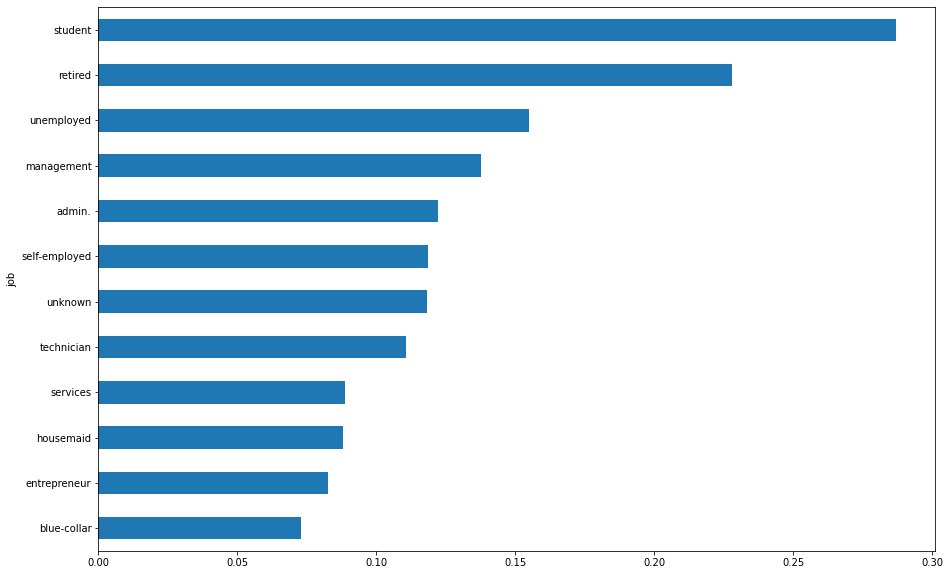

***************************************************************************************************************************


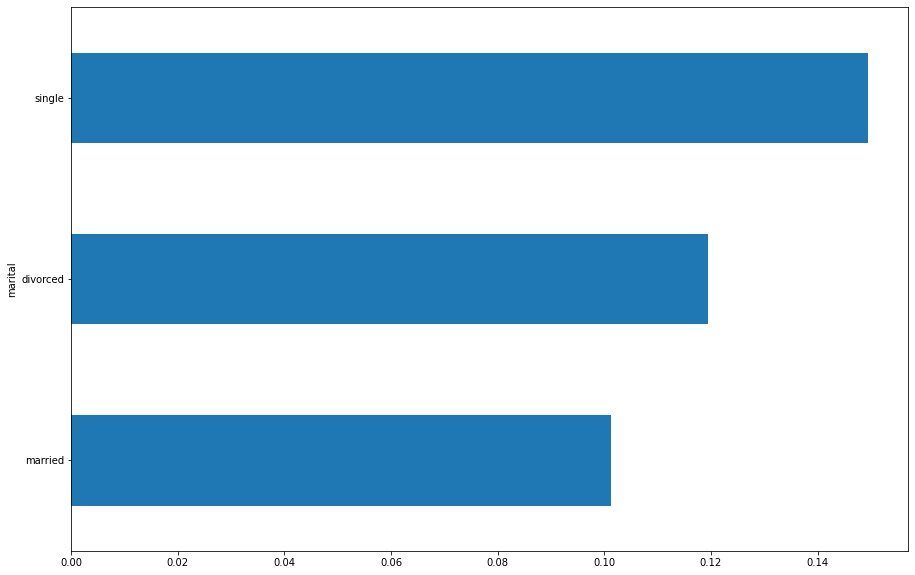

***************************************************************************************************************************


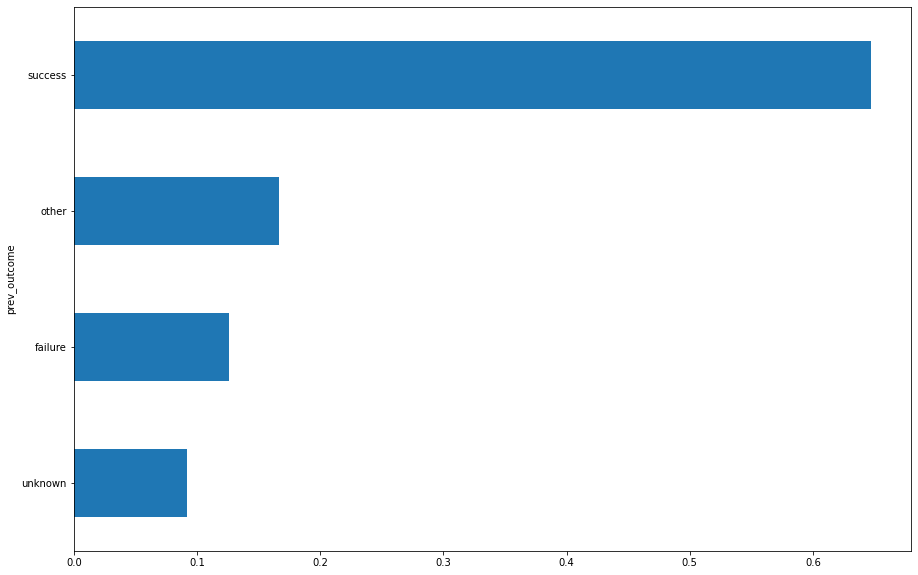

***************************************************************************************************************************


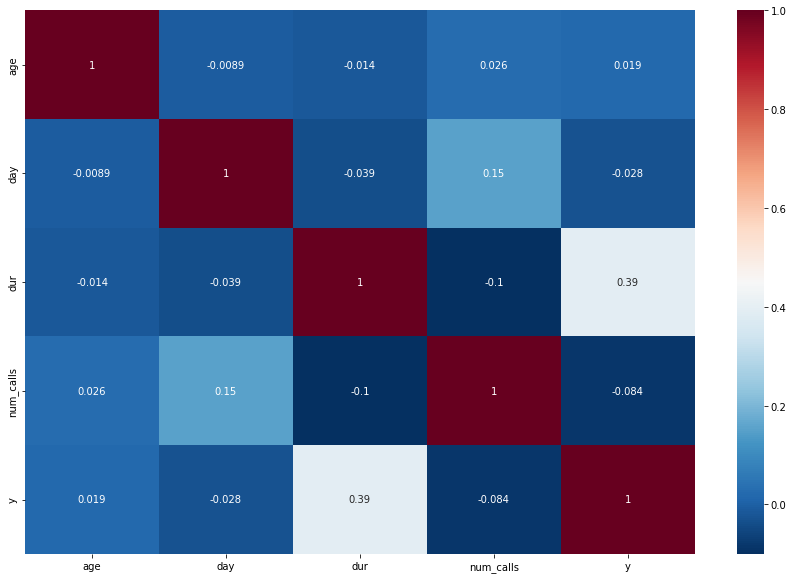

******************************************************************************************************************************


In [15]:
cat_features=['education_qual','call_type','mon','job','marital','prev_outcome']
num_features=['age','day','dur','num_calls']
features=cat_features+num_features
EDA(df,cat_features,num_features,'y')

# **Dealing with missing value.**

In [17]:
#df['job']=df['job'].fillna(df['job'].value_counts().index[0])        # In the job column, unknown values was filled by mode values
#df['education_qual']=df['education_qual'].fillna(df['education_qual'].value_counts().index[0])  # in education_qualification column, unknown values filled by mode values
#df.isnull().sum()

In [19]:
df['prev_outcome']=df['prev_outcome'].replace('other','unknown')
df.isnull().sum()

age               0
job               0
marital           0
education_qual    0
call_type         0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

# **Encoding of catagorical columns**

In [20]:
df['education_qual'] = df.education_qual.map({'primary':1,'secondary':2,'tertiary':3,'unknown':4})
df['call_type'] = df.call_type.map({'telephone':1,'cellular':2,'unknown':3})
df['mon'] = df.mon.map({'jan':10,'feb':6,'mar':1,'apr':5,'may':12,'jun':8,'jul':11,'aug':7,'sep':3,'oct':4,'nov':9,'dec':2})
df['job']=df.job.map({'management':4, 'technician':7, 'entrepreneur':10, 'blue-collar':11, 'retired':2, 'admin.' :5, 'services':8, 'self-employed':6,'unemployed':3, 'housemaid':9, 'student':1,'unknown':12})
df['marital']=df.marital.map({'married':3, 'single':1, 'divorced':2})
df['prev_outcome']=df.prev_outcome.map({'success':1,'failure':2,'unknown':3})

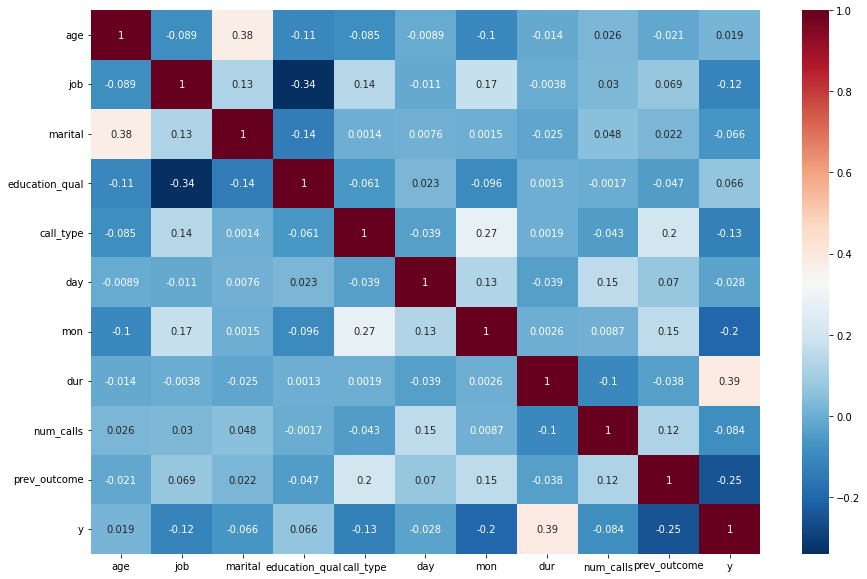

In [21]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),cmap='RdBu_r',annot=True)
plt.show()

# **Checking the imbalance of dataset**

In [22]:
def check_imbalance(data,target):
  count_data=pd.DataFrame(data[target].value_counts()).reset_index()
  count_data.columns=[target,'count']
  count_data['percentage']=(count_data['count']/sum(count_data['count']))*100
  count_data.columns=[target,'count','percentage']
  return count_data

In [23]:
count=check_imbalance(df,'y')
count

,y,count,percentage
0,0,39916,88.299967
1,1,5289,11.700033


***This is Highly imbalaced dataset***

In [24]:
!pip install imblearn
import imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **4. Splitting the data**

In [25]:
X=df.drop('y',axis=1)
y=df['y']

In [27]:
def split(X,y):
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=37,stratify=y)# spliting the data
  return X_train, X_test, y_train, y_test

In [28]:
X_train,X_test,y_train,y_test=split(X,y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(36164, 10) (9041, 10) (36164,) (9041,)


In [29]:
def balancing (x,y):
  from imblearn.combine import SMOTEENN
  from imblearn.under_sampling import RandomUnderSampler
  SM=SMOTEENN(random_state=37)
  X_SM,y_SM=SM.fit_resample(x,y)
  return X_SM,y_SM

In [30]:
X_train,y_train=balancing(X_train,y_train)

In [153]:
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

In [32]:
y_train.shape

(54584,)

# **5. Scaling the data**

In [156]:
def scaling(train,test):
  from sklearn.preprocessing import StandardScaler
  scaler=StandardScaler() #scaling the data  
  X_train_scale=scaler.fit_transform(train) 
  X_test_scale=scaler.transform(test)
  return X_train_scale,X_test_scale

In [157]:
X_train_scale,X_test_scale=scaling(X_train,X_test)

In [158]:
X_test_scale

array([[-0.54521444,  0.27353588,  0.96165375, ..., -0.52713891,
        -0.15497581, -0.85410381],
       [ 0.51936724, -0.0675108 ,  0.96165375, ..., -1.36192084,
        -0.84547393,  0.60264719],
       [ 1.31780349,  0.27353588, -1.30420606, ..., -0.90658524,
        -0.15497581,  0.60264719],
       ...,
       [ 0.78551266, -0.74960415,  0.96165375, ..., -0.34215882,
         1.91651854,  0.60264719],
       [ 0.87422779,  1.2966759 , -1.30420606, ...,  0.36455998,
        -0.84547393,  0.60264719],
       [-0.10163874, -0.74960415,  0.96165375, ..., -1.1437392 ,
        -0.15497581, -0.85410381]])

# **6. Build the model**

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, plot_roc_curve, confusion_matrix, f1_score,roc_auc_score

In [139]:
def algorithm (model,X_train, X_test, y_train, y_test,k):
  mod=model
  mod=mod.fit(X_train, y_train)
  y_predict_mod=mod.predict(X_test)
  y_pred_train=mod.predict(X_train)
  result= pd.DataFrame({'actual': y_test, 'predict': y_predict_mod})
  score=mod.score(X_test,y_test)
  print('for ' ,k ,' value ',"Train Accuracy : ",round(roc_auc_score(y_train,y_pred_train),3),"Val Accuracy : ", round(np.mean(cross_val_score(mod, X_train, y_train, cv=10,scoring='roc_auc')),3))
  return y_predict_mod,result,score,mod

# **i) Logistic Regression algorithm**

In [140]:
y_predict_log,result_L,score_L,log=algorithm(LogisticRegression(random_state=37),X_train_scale, X_test_scale, y_train, y_test,1)
print(y_predict_log)
print(result_L.head(10))
print(' Score of LogisticRegression algorithmn is ', score_L)

for  1  value  Train Accuracy :  0.914 Val Accuracy :  0.971
[0 0 1 ... 0 1 1]
       actual  predict
36417       0        0
27230       0        0
30772       0        1
20305       0        0
22660       0        0
20998       0        0
38519       0        0
32139       0        0
34499       0        0
20868       0        1
 Score of LogisticRegression algorithmn is  0.7925008295542528


# **ii) KNN classifier algorithm**

In [38]:
#for i in range (1,10):
  #algorithm(KNeighborsClassifier(i),X_train_scale, X_test_scale, y_train, y_test,i)

In [141]:
y_predict_knn,result_K,score_K,knn=algorithm(KNeighborsClassifier(7),X_train_scale, X_test_scale, y_train, y_test,7)
print(y_predict_knn)
print(result_K)
print(' Score of KNN classifier algorithmn is ', score_K)

for  7  value  Train Accuracy :  0.95 Val Accuracy :  0.977
[0 0 1 ... 0 0 0]
       actual  predict
36417       0        0
27230       0        0
30772       0        1
20305       0        0
22660       0        0
...       ...      ...
45082       0        1
9364        0        0
13651       0        0
11239       0        0
32982       0        0

[9041 rows x 2 columns]
 Score of KNN classifier algorithmn is  0.8115252737529034


# **iii)Decision Tree algorithm**

In [142]:
for i in range(1,20):
  algorithm(DecisionTreeClassifier(max_depth=i,random_state=37),X_train_scale, X_test_scale, y_train, y_test,i)

for  1  value  Train Accuracy :  0.781 Val Accuracy :  0.78
for  2  value  Train Accuracy :  0.83 Val Accuracy :  0.861
for  3  value  Train Accuracy :  0.866 Val Accuracy :  0.914
for  4  value  Train Accuracy :  0.888 Val Accuracy :  0.942
for  5  value  Train Accuracy :  0.906 Val Accuracy :  0.955
for  6  value  Train Accuracy :  0.919 Val Accuracy :  0.965
for  7  value  Train Accuracy :  0.925 Val Accuracy :  0.97
for  8  value  Train Accuracy :  0.937 Val Accuracy :  0.972
for  9  value  Train Accuracy :  0.946 Val Accuracy :  0.974
for  10  value  Train Accuracy :  0.956 Val Accuracy :  0.973
for  11  value  Train Accuracy :  0.963 Val Accuracy :  0.971
for  12  value  Train Accuracy :  0.969 Val Accuracy :  0.969
for  13  value  Train Accuracy :  0.976 Val Accuracy :  0.966
for  14  value  Train Accuracy :  0.982 Val Accuracy :  0.964
for  15  value  Train Accuracy :  0.986 Val Accuracy :  0.961
for  16  value  Train Accuracy :  0.99 Val Accuracy :  0.958
for  17  value  Train

In [41]:
y_predict_dt,result_D,score_D,dt=algorithm(DecisionTreeClassifier(max_depth=9,random_state=37),X_train_scale, X_test_scale, y_train, y_test,9)
print(y_predict_dt)
print(result_D)
print(' Score of Decision Tree algorithmn is ', score_D)

for  9  value  Train Accuracy :  0.946 Val Accuracy :  0.972
[0 0 0 ... 0 0 1]
       actual  predict
36417       0        0
27230       0        0
30772       0        0
20305       0        0
22660       0        0
...       ...      ...
45082       0        0
9364        0        0
13651       0        0
11239       0        0
32982       0        1

[9041 rows x 2 columns]
 Score of Decision Tree algorithmn is  0.8187147439442539


In [42]:
importance = dt.feature_importances_
list(zip(importance,features))

[(0.013514076426457761, 'education_qual'),
 (0.026821815881251584, 'call_type'),
 (0.005352653883626707, 'mon'),
 (0.001048314216908073, 'job'),
 (0.08184442973219112, 'marital'),
 (0.03693405516389055, 'prev_outcome'),
 (0.20546504161432178, 'age'),
 (0.5309743411919895, 'day'),
 (0.012852035802638793, 'dur'),
 (0.08519323608672412, 'num_calls')]

# **iv) Random Forest Classifier**

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
for i in [5,10,20,30,40,50,60,70,80,90,100]:
  algorithm(RandomForestClassifier(max_depth=4,n_estimators=i,random_state=37,max_features='sqrt'),X_train_scale, X_test_scale, y_train, y_test,i)

for  5  value  Train Accuracy :  0.889 Val Accuracy :  0.956
for  10  value  Train Accuracy :  0.905 Val Accuracy :  0.966
for  20  value  Train Accuracy :  0.897 Val Accuracy :  0.966
for  30  value  Train Accuracy :  0.9 Val Accuracy :  0.967
for  40  value  Train Accuracy :  0.904 Val Accuracy :  0.97
for  50  value  Train Accuracy :  0.905 Val Accuracy :  0.971
for  60  value  Train Accuracy :  0.907 Val Accuracy :  0.971
for  70  value  Train Accuracy :  0.907 Val Accuracy :  0.971
for  80  value  Train Accuracy :  0.906 Val Accuracy :  0.971
for  90  value  Train Accuracy :  0.906 Val Accuracy :  0.971
for  100  value  Train Accuracy :  0.906 Val Accuracy :  0.971


In [45]:
y_predict_rfc,result_R,score_R,rfc=algorithm(RandomForestClassifier(max_depth=4,n_estimators=60,random_state=37,max_features='sqrt'),X_train_scale, X_test_scale, y_train, y_test,60)
print(y_predict_rfc)
print(result_R)
print(' Score of random forest algorithmn is ', score_R)

for  60  value  Train Accuracy :  0.907 Val Accuracy :  0.971
[0 0 0 ... 0 0 0]
       actual  predict
36417       0        0
27230       0        0
30772       0        0
20305       0        0
22660       0        0
...       ...      ...
45082       0        0
9364        0        0
13651       0        0
11239       0        0
32982       0        0

[9041 rows x 2 columns]
 Score of random forest algorithmn is  0.7509125096781329


# **v)Xgboost classifier**

In [46]:
import xgboost as xgb

In [143]:
for i in np.arange(0.1,1.1,0.1):
  algorithm(xgb.XGBClassifier(learning_rate=i,n_estimators= 100,random_state=37),X_train_scale, X_test_scale, y_train, y_test,i)

for  0.1  value  Train Accuracy :  0.949 Val Accuracy :  0.989
for  0.2  value  Train Accuracy :  0.961 Val Accuracy :  0.992
for  0.30000000000000004  value  Train Accuracy :  0.966 Val Accuracy :  0.994
for  0.4  value  Train Accuracy :  0.97 Val Accuracy :  0.994
for  0.5  value  Train Accuracy :  0.972 Val Accuracy :  0.995
for  0.6  value  Train Accuracy :  0.974 Val Accuracy :  0.995
for  0.7000000000000001  value  Train Accuracy :  0.975 Val Accuracy :  0.995
for  0.8  value  Train Accuracy :  0.976 Val Accuracy :  0.995
for  0.9  value  Train Accuracy :  0.977 Val Accuracy :  0.995
for  1.0  value  Train Accuracy :  0.977 Val Accuracy :  0.995


In [144]:
y_predict_Xgb,result_X,score_X,Xgb=algorithm(xgb.XGBClassifier(learning_rate=1.0,n_estimators= 100,random_state=37),X_train_scale, X_test_scale, y_train, y_test,1.0)
print(y_predict_Xgb)
print(result_X)
print(' Score of Xgboost algorithmn is ', score_X)

for  1.0  value  Train Accuracy :  0.977 Val Accuracy :  0.995
[0 0 0 ... 0 0 0]
       actual  predict
36417       0        0
27230       0        0
30772       0        0
20305       0        0
22660       0        0
...       ...      ...
45082       0        0
9364        0        0
13651       0        0
11239       0        0
32982       0        0

[9041 rows x 2 columns]
 Score of Xgboost algorithmn is  0.8693728569848468


# **vi)Voting Classifier**

In [49]:
from sklearn.ensemble import VotingClassifier

In [50]:
y_predict_vot,result_V,score_V,vot=algorithm(VotingClassifier(estimators= [('LR',log),('KNN',knn),('DT',dt),('RF',rfc),('XGB',Xgb)],voting='soft'),X_train_scale, X_test_scale, y_train, y_test,'5 models')
print(y_predict_vot)
print(result_V)
print(' Score of Voting classifier algorithmn is ', score_V)

for  5 models  value  Train Accuracy :  0.961 Val Accuracy :  0.99
[0 0 0 ... 0 0 0]
       actual  predict
36417       0        0
27230       0        0
30772       0        0
20305       0        0
22660       0        0
...       ...      ...
45082       0        0
9364        0        0
13651       0        0
11239       0        0
32982       0        0

[9041 rows x 2 columns]
 Score of Voting classifier algorithmn is  0.8314345758212587


# **7.  Evaluation metrics**

In [51]:
def evaluate(mod,X_test,y_test,predict):
  acc=accuracy_score(y_test,predict)
  roc=roc_auc_score(y_test,predict)
  #plt.figure(figsize=(20,10))
  plot_roc_curve(mod,X_test,y_test)
  plt.show()
  print('accuracy score',mod,': ',acc)
  print('AUROC  score of ',mod,': ', roc)

In [52]:
def confuse_matrix(test,predict):
  cm = confusion_matrix(test,predict)
  return cm

# **i) Evaluation metric for logistic regression algorithm**

In [53]:
cm_log=confuse_matrix(y_test,y_predict_log)
cm_log

array([[6289, 1694],
       [ 182,  876]])

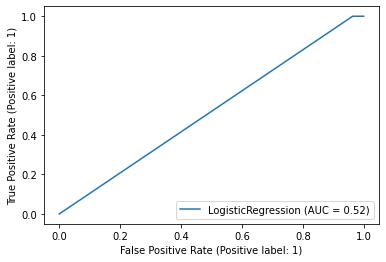

accuracy score LogisticRegression(random_state=37) :  0.7925008295542528
AUROC  score of  LogisticRegression(random_state=37) :  0.8078881943600851


In [54]:
evaluate(log,X_test,y_test,y_predict_log)

In [55]:
print('error rate of model is : ',np.mean(y_predict_log!=y_test))

error rate of model is :  0.20749917044574714


# **ii) Evaluation metric for KNN classifier algorithm**

In [56]:
cm_knn=confuse_matrix(y_test,y_predict_knn)
cm_knn

array([[6464, 1519],
       [ 185,  873]])

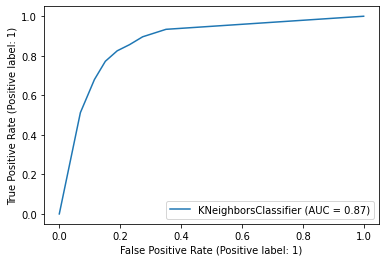

accuracy score KNeighborsClassifier(n_neighbors=7) :  0.8115252737529034
AUROC  score of  KNeighborsClassifier(n_neighbors=7) :  0.8174312166662285


In [57]:
evaluate(knn,X_test_scale,y_test,y_predict_knn)

In [58]:
print('error rate of model is : ',np.mean(y_predict_knn!=y_test))

error rate of model is :  0.18847472624709655


# **iii) Evaluation metric for Decision Tree classifier algorithm**

In [59]:
cm_dt=confuse_matrix(y_test,y_predict_dt)
print(cm_dt)

[[6521 1462]
 [ 177  881]]


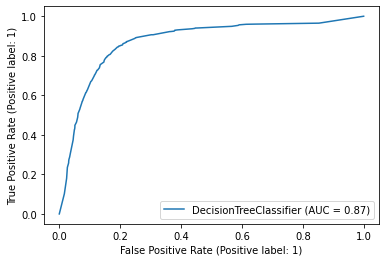

accuracy score DecisionTreeClassifier(max_depth=9, random_state=37) :  0.8187147439442539
AUROC  score of  DecisionTreeClassifier(max_depth=9, random_state=37) :  0.8247820214363841


In [60]:
evaluate(dt,X_test_scale,y_test,y_predict_dt)

In [61]:
from sklearn import tree

In [62]:
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
#tree.plot_tree(dt,filled = True);
#fig.savefig('imagename1.png')

In [63]:
print('error rate of model is : ',np.mean(y_predict_dt!=y_test))

error rate of model is :  0.18128525605574605


In [64]:
importance = dt.feature_importances_
importance
list(zip(importance,df.columns))

[(0.013514076426457761, 'age'),
 (0.026821815881251584, 'job'),
 (0.005352653883626707, 'marital'),
 (0.001048314216908073, 'education_qual'),
 (0.08184442973219112, 'call_type'),
 (0.03693405516389055, 'day'),
 (0.20546504161432178, 'mon'),
 (0.5309743411919895, 'dur'),
 (0.012852035802638793, 'num_calls'),
 (0.08519323608672412, 'prev_outcome')]

# **iv)Evaluation metric for RandomForest classifier**

In [65]:
cm_rfc=confuse_matrix(y_test,y_predict_rfc)
print(cm_rfc)

[[5851 2132]
 [ 120  938]]


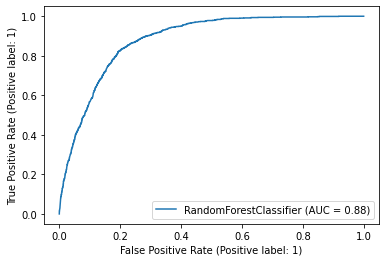

accuracy score RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=60,
                       random_state=37) :  0.7509125096781329
AUROC  score of  RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=60,
                       random_state=37) :  0.8097554657143594


In [66]:
evaluate(rfc,X_test_scale,y_test,y_predict_rfc)

In [67]:
print('error rate of model is : ',np.mean(y_predict_rfc!=y_test))

error rate of model is :  0.24908749032186706


# **v)Evaluation metric for Xgboost classifier**

In [68]:
cm_Xgb=confuse_matrix(y_test,y_predict_Xgb)
print(cm_Xgb)

[[7062  921]
 [ 260  798]]


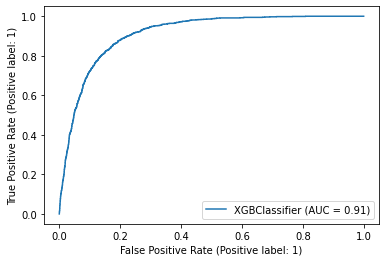

accuracy score XGBClassifier(learning_rate=1.0, random_state=37) :  0.8693728569848468
AUROC  score of  XGBClassifier(learning_rate=1.0, random_state=37) :  0.8194415732675792


In [145]:
evaluate(Xgb,X_test_scale,y_test,y_predict_Xgb)

In [146]:
print('error rate of model is : ',np.mean(y_predict_Xgb!=y_test))

error rate of model is :  0.13062714301515319


# **vi) evaluation metric for Voting classifier**

In [71]:
cm_vot=confuse_matrix(y_test,y_predict_vot)
cm_vot

array([[6626, 1357],
       [ 167,  891]])

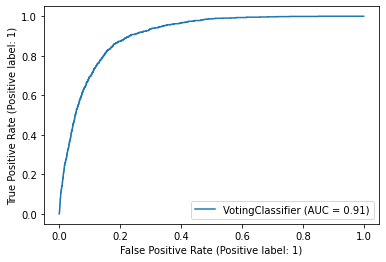

accuracy score VotingClassifier(estimators=[('LR', LogisticRegression(random_state=37)),
                             ('KNN', KNeighborsClassifier(n_neighbors=7)),
                             ('DT',
                              DecisionTreeClassifier(max_depth=9,
                                                     random_state=37)),
                             ('RF',
                              RandomForestClassifier(max_depth=4,
                                                     max_features='sqrt',
                                                     n_estimators=60,
                                                     random_state=37)),
                             ('XGB',
                              XGBClassifier(learning_rate=1.0,
                                            random_state=37))],
                 voting='soft') :  0.8314345758212587
AUROC  score of  VotingClassifier(estimators=[('LR', LogisticRegression(random_state=37)),
                             ('KNN'

In [72]:
evaluate(vot,X_test_scale,y_test,y_predict_vot)

In [73]:
print('error rate of model is : ',np.mean(y_predict_vot!=y_test))

error rate of model is :  0.1685654241787413


# **Plot decision region boundary**

In [74]:
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [75]:
import mlxtend
mlxtend.__version__

'0.21.0'

# **1)Logistic regression**

In [76]:
def PlotDecisionRegion(mod,df,feature,target):
  X=df.loc[:,feature].values
  y=df.loc[:,target].values
  model=mod
  model.fit(X,y)
  plt.figure(figsize=(15,10))
  plot_decision_regions(X,y,model)

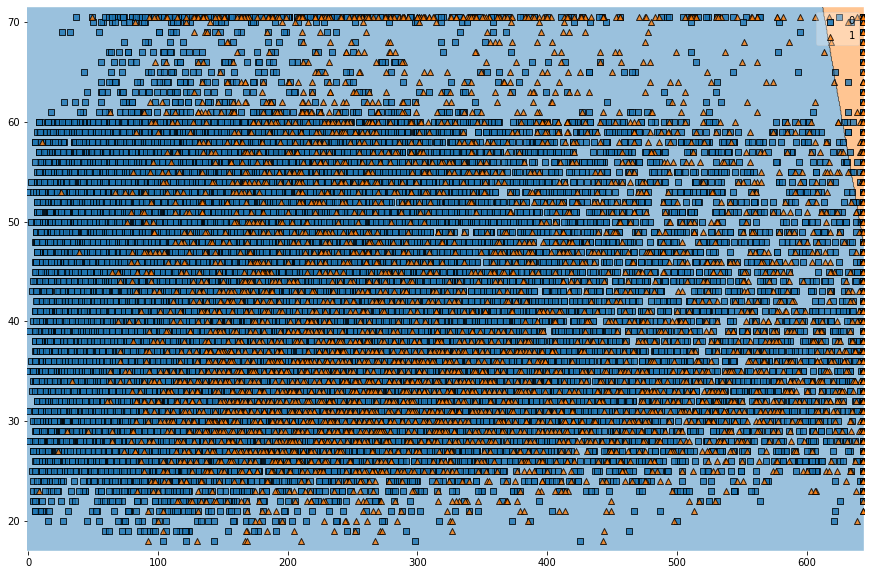

In [84]:
PlotDecisionRegion(log,df,['dur','age'],'y')

# **2)KNN classifier**

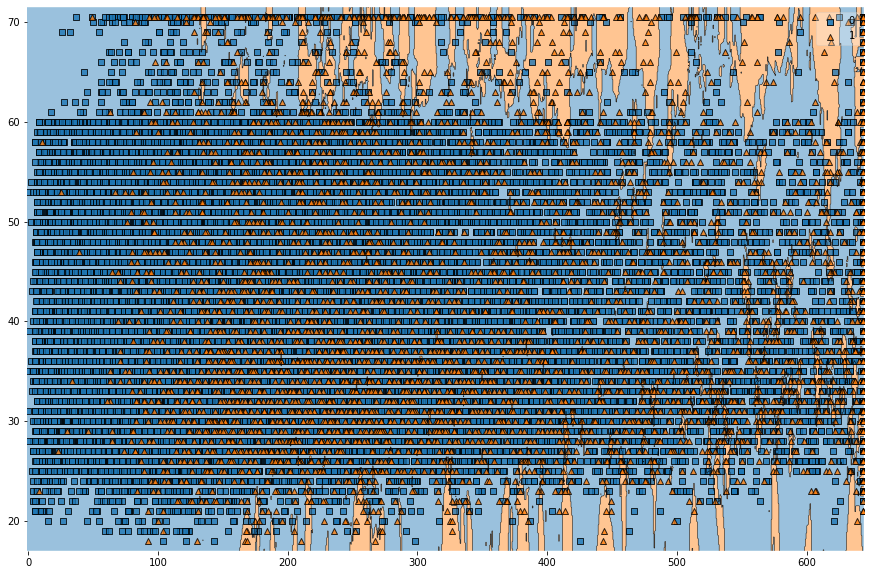

In [85]:
PlotDecisionRegion(knn,df,['dur','age'],'y')

# **3)Decition tree**

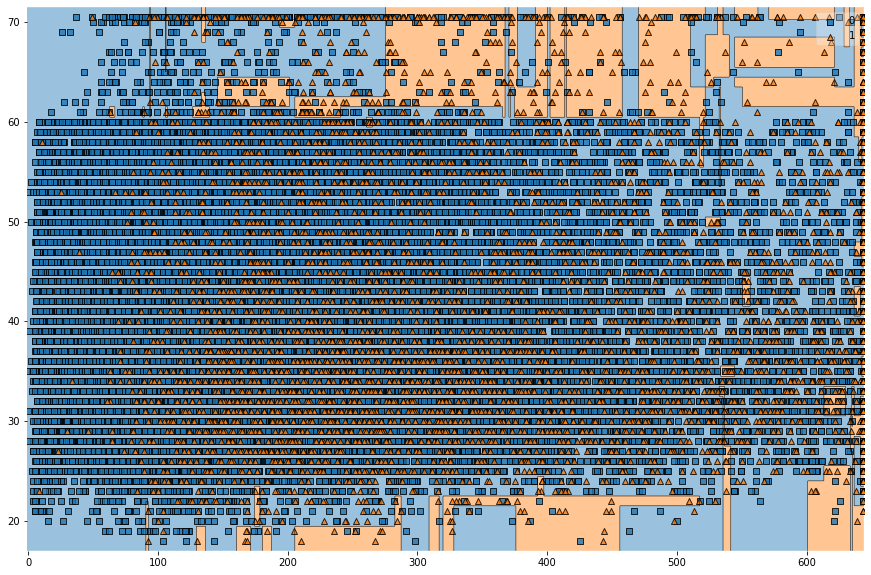

In [86]:
PlotDecisionRegion(dt,df,['dur','age'],'y')

# **4)Random Forest model**

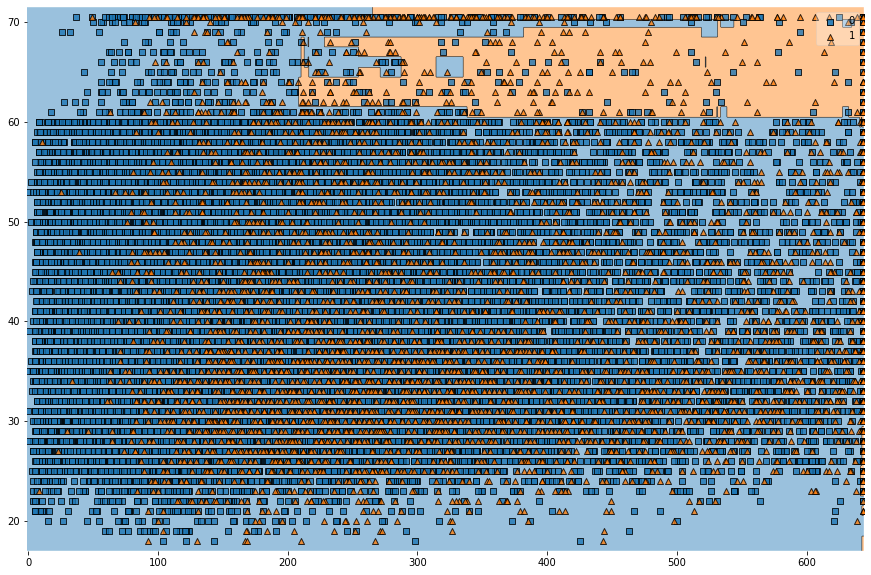

In [87]:
PlotDecisionRegion(rfc,df,['dur','age'],'y')

# **5)XgBOOST classifier**

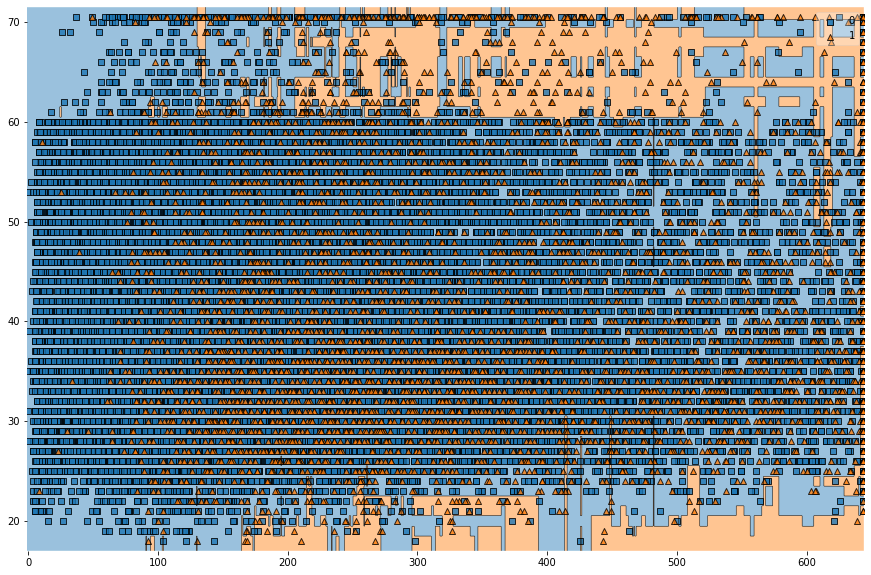

In [88]:
PlotDecisionRegion(Xgb,df,['dur','age'],'y')

# ***Pickle the model***

In [159]:
y_predict_Xgb,result_X,score_X,Xgb=algorithm(xgb.XGBClassifier(learning_rate=1.0,n_estimators= 100,random_state=37),X_train, X_test, y_train, y_test,1.0)

for  1.0  value  Train Accuracy :  0.977 Val Accuracy :  0.995


In [160]:
import pickle
pickle.dump(Xgb,open('best_Xgb_model.pkl','wb'))

In [161]:
model=pickle.load(open('best_Xgb_model.pkl','rb'))

In [162]:
result=[45,8,2,2,1,11,3,37,2,3]
model.predict([[45,8,2,2,1,11,3,37,2,3]])

array([0])

In [129]:
X_test

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome
36417,35.0,7,3,2,2,11,12,204.0,2.0,2
27230,47.0,6,3,3,1,21,9,28.0,1.0,3
30772,56.0,7,1,1,1,6,6,124.0,2.0,3
20305,38.0,6,1,3,2,11,7,176.0,3.0,3
22660,53.0,12,3,4,2,25,7,209.0,5.0,3
...,...,...,...,...,...,...,...,...,...,...
45082,66.0,2,3,1,2,22,4,56.0,2.0,3
9364,36.0,11,1,2,3,6,8,399.0,1.0,3
13651,50.0,4,3,3,2,9,11,243.0,5.0,3
11239,51.0,10,1,2,3,18,8,392.0,1.0,3


# **Deploy the Model**

In [91]:
!pip install streamlit
!pip install writefile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 56.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 65.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 23.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.4 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19581 sha256=98a0d411ad4f0a524ab391745c63519b3527a4039be72

In [164]:
%%writefile app_ccp.py

import numpy
import pickle
import pandas as pd
import streamlit as st

model=pickle.load(open('best_Xgb_model.pkl','rb'))

def deploy():
  st.set_page_config(layout='wide')
  
  st.title('CUSTOMER CONVERSION PREDICTION')
  st.header('Enter the details of customer')
  age=st.number_input('Age of customer :',min_value=10,max_value=100)
  job=st.radio('job of customer :',['management', 'technician', 'entrepreneur', 'blue-collar', 'retired', 'admin.', 'services', 'self-employed','unemployed', 'housemaid', 'student','unknown'],horizontal=True)
  marital=st.radio('marital status of customer :',['married', 'single', 'divorced'],horizontal=True)
  education=st.radio('education qualification of customer :', ['tertiary', 'secondary', 'primary','unknown'],horizontal=True)
  call_type=st.radio('which medium connectr to customer :' , ['cellular', 'telephone','unknown'],horizontal=True)
  day=st.number_input('connecting date of month :' , min_value=1,max_value=31)
  month=st.radio('month of customer contact :', ['jan', 'feb','mar', 'apr','may', 'jun', 'jul', 'aug','sep','oct', 'nov', 'dec'],horizontal=True )
  dur=st.number_input('duration of call in minutes :', min_value=1,max_value=5000)
  num_of_calls=st.number_input('no of attempt to customer :',min_value=1,max_value=70)
  previous_outcome=st.radio('previous decision by customer :',['success','failure','unknown'],horizontal=True)
  if st.button('predict_conversion'):
    conversion=predict(age,job,marital,education,call_type,day,month,dur,num_of_calls,previous_outcome)
    st.success(f'CHANCES OF GETTING INSURANCE IS {conversion}')
  
def predict(age,job,marital,education,call_type,day,month,dur,num_of_calls,previous_outcome):
  edu={'primary':1,'secondary':2,'tertiary':3,'unknown':4}
  education_qual=edu[education]
  call={'telephone':1,'cellular':2,'unknown':3}
  call_type =call[call_type]
  mon={'jan':10,'feb':6,'mar':1,'apr':5,'may':12,'jun':8,'jul':11,'aug':7,'sep':3,'oct':4,'nov':9,'dec':2}
  mon = mon[month]
  Job={'management':4, 'technician':7, 'entrepreneur':10, 'blue-collar':11, 'retired':2, 'admin.' :5, 'services':8, 'self-employed':6,'unemployed':3, 'housemaid':9, 'student':1,'unknown':12}
  job = Job[job]
  marriage ={'married':3, 'single':1, 'divorced':2}
  marital=marriage[marital]
  previous={'success':1,'failure':2,'unknown':3}
  prev_outcome= previous[previous_outcome]
  prediction=model.predict([[age,job,marital,education_qual,call_type,day,mon,dur,num_of_calls,prev_outcome]])
  if prediction==0:
      result='LOW'
  elif prediction==1:
      result='HIGH'
    
  return result
  

if __name__=='__main__':
  deploy()

Overwriting app_ccp.py


In [93]:
import streamlit as st


In [165]:
!streamlit run app_ccp.py & npx localtunnel --port 8501

[##................] \ loadDep:strip-ansi: sill resolveWithNewModule strip-ansi


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.75.216.12:8501

npx: installed 22 in 4.632s
your url is: https://cold-games-stare-34-75-216-12.loca.lt
  Stopping...
^C
